# Budget Allocation Reccomendations Based on 2017 - 2019 SAT Scores and Participation Rates

## Executive Summary


This report was commissioned to analyze data collected for SAT and ACT exams, and create recommendations for budget allocations that will ultimately increases SAT participation. Data includes mean scores per state from years 2017 to 2019, and corresponding participation rates for both exams.

Data was obtained from the following resources:
- ACT Scores & Participation:
 - https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows &
 - https://www.act.org/content/act/en/research/reports/act-publications/condition-of-college-and-career-readiness-2017.html
- SAT Scores & Participation:
 - https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/ &
 - https://blog.prepscholar.com/average-sat-scores-by-state-most-rece
The data was analyzed to find trends and correlations using math functions and several plots. Data was relitavized in order to provide uniform graphs despite the differing grading scales.
    
This research brought to light the importance of state mandated test taking. In states where our competition's exam is mandated, our participation rates are lowest. The average student is not participating in two exams, instead, the data shows that only top performers are taking the SAT when otherwise mandated to take the ACT.

Based on the findings, it is recommend that we allocate funds equally for lobbying and advertising. We recommend the lobbying budget be allocated toward courting state government lawmakers in states where no exam is currently mandated, specifically New York and California, as they have the highest populations of unmandated students. This will include encouraging state universities to require the exam for admission. Finally, we recommend the advertising budget be spent on Facebook ads, designed to convince parents with 16 - 18 year old teens in ACT mandated states, that an SAT exam is now needed for their child to be competitive in college admissions.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [ ]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import censusdata
from tabulate import tabulate
import plotly.figure_factory as ff
import plotly
import plotly.graph_objects as go
import geopandas
import json
import requests

## 2017 Data Import and Cleaning

#### 1. Reading In SAT & ACT  Data


In [ ]:
act_17 = pd.read_csv('/data/act_2017.csv')

In [ ]:
act_18 = pd.read_csv('/data/act_2018.csv')

In [ ]:
act_19 = pd.read_csv('/data/act_2019.csv')

In [ ]:
sat_17 = pd.read_csv('/data/sat_2017.csv')

In [ ]:
sat_18 = pd.read_csv('/data/sat_2018.csv')

In [ ]:
#did an on spot correction while previewing the data in Excel, removing 'x' from a column
sat_19 = pd.read_csv('/data/sat_2019_2.csv')

#### 2. Preview and inspection of the data


In [ ]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [ ]:
act_17.info() #only year that score isn't broken down

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [ ]:
act_18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [ ]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
act_19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [ ]:
act_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [ ]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [ ]:
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [ ]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [ ]:
sat_19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [ ]:
sat_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


#### 3. Look for errors in the data


In [ ]:
act_17['Participation'].value_counts #numbers are object data types

<bound method IndexOpsMixin.value_counts of 0      60%
1     100%
2      65%
3      62%
4     100%
5      31%
6     100%
7      31%
8      18%
9      32%
10     73%
11     55%
12     90%
13     38%
14     93%
15     35%
16     67%
17     73%
18    100%
19    100%
20      8%
21     28%
22     29%
23     29%
24    100%
25    100%
26    100%
27    100%
28     84%
29    100%
30     18%
31     34%
32     66%
33     31%
34    100%
35     98%
36     75%
37    100%
38     40%
39     23%
40     21%
41    100%
42     80%
43    100%
44     45%
45    100%
46     29%
47     29%
48     29%
49     69%
50    100%
51    100%
Name: Participation, dtype: object>

In [ ]:
act_18['Participation'].value_counts #numbers are object data types

<bound method IndexOpsMixin.value_counts of 0     100%
1      33%
2      66%
3     100%
4      27%
5      30%
6      26%
7      17%
8      32%
9      66%
10     53%
11     89%
12     36%
13     43%
14     32%
15     68%
16     71%
17    100%
18    100%
19      7%
20      7%
21     31%
22     25%
23     22%
24     99%
25    100%
26    100%
27    100%
28    100%
29    100%
30     16%
31     31%
32     67%
33     27%
34    100%
35     98%
36    100%
37    100%
38     42%
39     20%
40     15%
41    100%
42     77%
43    100%
44     45%
45    100%
46     24%
47     24%
48     24%
49     65%
50    100%
51    100%
Name: Participation, dtype: object>

In [ ]:
act_19['Participation'].value_counts #numbers are object data types

<bound method IndexOpsMixin.value_counts of 0     100%
1      38%
2      73%
3     100%
4      23%
5      27%
6      22%
7      13%
8      32%
9      54%
10     49%
11     80%
12     31%
13     35%
14     29%
15     66%
16     72%
17    100%
18    100%
19      6%
20     28%
21     21%
22     19%
23     95%
24    100%
25     82%
26    100%
27    100%
28    100%
29     14%
30     25%
31     63%
32     22%
33    100%
34     96%
35    100%
36    100%
37     42%
38     17%
39     12%
40     78%
41     75%
42    100%
43     39%
44    100%
45     20%
46     21%
47     24%
48     49%
49    100%
50    100%
51     52%
Name: Participation, dtype: object>

In [ ]:
sat_17['Participation'].value_counts #numbers are object data types

<bound method IndexOpsMixin.value_counts of 0       5%
1      38%
2      30%
3       3%
4      53%
5      11%
6     100%
7     100%
8     100%
9      83%
10     61%
11     55%
12     93%
13      9%
14     63%
15      2%
16      4%
17      4%
18      4%
19     95%
20     69%
21     76%
22    100%
23      3%
24      2%
25      3%
26     10%
27      3%
28     26%
29     96%
30     70%
31     11%
32     67%
33     49%
34      2%
35     12%
36      7%
37     43%
38     65%
39     71%
40     50%
41      3%
42      5%
43     62%
44      3%
45     60%
46     65%
47     64%
48     14%
49      3%
50      3%
Name: Participation, dtype: object>

In [ ]:
sat_18['Participation'].value_counts #numbers are object data types

<bound method IndexOpsMixin.value_counts of 0       6%
1      43%
2      29%
3       5%
4      60%
5     100%
6     100%
7     100%
8      92%
9      56%
10     70%
11     56%
12    100%
13     99%
14     63%
15      3%
16      4%
17      4%
18      4%
19     99%
20     76%
21     80%
22    100%
23      4%
24      3%
25      4%
26     10%
27      3%
28     23%
29     96%
30     82%
31     16%
32     79%
33     52%
34      2%
35      8%
36     18%
37     48%
38     70%
39     97%
40     55%
41      3%
42      6%
43     66%
44      4%
45     64%
46     68%
47     69%
48     28%
49      3%
50      3%
Name: Participation, dtype: object>

In [ ]:
sat_19.rename(columns = {'Participation Rate':'Participation'}, inplace = True) #renaming column for uniformity

In [ ]:
sat_19['Participation'].value_counts #numbers are object data types; has null values

<bound method IndexOpsMixin.value_counts of 0       7%
1      41%
2      31%
3       6%
4      63%
5     100%
6     100%
7     100%
8      94%
9     100%
10     71%
11     54%
12    100%
13    100%
14     66%
15      3%
16      4%
17      4%
18      5%
19     99%
20     82%
21     81%
22    100%
23      4%
24      3%
25      4%
26      9%
27      3%
28     20%
29     95%
30     82%
31     18%
32     79%
33     51%
34      2%
35     19%
36     22%
37     51%
38     70%
39     NaN
40    100%
41     68%
42      3%
43      7%
44     68%
45      4%
46     66%
47     NaN
48     68%
49     70%
50     99%
51      3%
52      3%
Name: Participation, dtype: object>

#### 4. Fixing identified errors

In [ ]:
#removing null values for SAT 19 Participation
act_17.shape

(52, 7)

In [ ]:
act_17.dropna(inplace = True)

In [ ]:
act_18.shape

(52, 3)

In [ ]:
act_18.dropna(inplace = True)

In [ ]:
act_19.shape

(52, 3)

In [ ]:
act_19.dropna(inplace = True)

In [ ]:
sat_17.shape

(51, 5)

In [ ]:
sat_17.dropna(inplace = True)

In [ ]:
sat_18.shape

(51, 5)

In [ ]:
sat_18.dropna(inplace = True)

In [ ]:
sat_19.shape

(53, 5)

In [ ]:
sat_19.dropna(inplace = True) #removed 2 null values from SAT 19

#### 5. Fixing incorrect data types

In [ ]:
#correcting data types for participation rows; leaving as percent figures for now, i.e. not n/100
act_17['Participation'] = act_17['Participation'].str.replace('%','').astype(float)

In [ ]:
act_17['Participation']

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [ ]:
act_18['Participation'] = act_18['Participation'].str.replace('%','').astype(float)

In [ ]:
act_18['Participation']

0     100.0
1      33.0
2      66.0
3     100.0
4      27.0
5      30.0
6      26.0
7      17.0
8      32.0
9      66.0
10     53.0
11     89.0
12     36.0
13     43.0
14     32.0
15     68.0
16     71.0
17    100.0
18    100.0
19      7.0
20      7.0
21     31.0
22     25.0
23     22.0
24     99.0
25    100.0
26    100.0
27    100.0
28    100.0
29    100.0
30     16.0
31     31.0
32     67.0
33     27.0
34    100.0
35     98.0
36    100.0
37    100.0
38     42.0
39     20.0
40     15.0
41    100.0
42     77.0
43    100.0
44     45.0
45    100.0
46     24.0
47     24.0
48     24.0
49     65.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [ ]:
act_19['Participation'] = act_19['Participation'].str.replace('%','').astype(float)

In [ ]:
act_19['Participation']

0     100.0
1      38.0
2      73.0
3     100.0
4      23.0
5      27.0
6      22.0
7      13.0
8      32.0
9      54.0
10     49.0
11     80.0
12     31.0
13     35.0
14     29.0
15     66.0
16     72.0
17    100.0
18    100.0
19      6.0
20     28.0
21     21.0
22     19.0
23     95.0
24    100.0
25     82.0
26    100.0
27    100.0
28    100.0
29     14.0
30     25.0
31     63.0
32     22.0
33    100.0
34     96.0
35    100.0
36    100.0
37     42.0
38     17.0
39     12.0
40     78.0
41     75.0
42    100.0
43     39.0
44    100.0
45     20.0
46     21.0
47     24.0
48     49.0
49    100.0
50    100.0
51     52.0
Name: Participation, dtype: float64

In [ ]:
sat_17['Participation'] = sat_17['Participation'].str.replace('%','').astype(float)

In [ ]:
sat_17['Participation']

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [ ]:
sat_18['Participation'] = sat_18['Participation'].str.replace('%','').astype(float)

In [ ]:
sat_18['Participation']

0       6.0
1      43.0
2      29.0
3       5.0
4      60.0
5     100.0
6     100.0
7     100.0
8      92.0
9      56.0
10     70.0
11     56.0
12    100.0
13     99.0
14     63.0
15      3.0
16      4.0
17      4.0
18      4.0
19     99.0
20     76.0
21     80.0
22    100.0
23      4.0
24      3.0
25      4.0
26     10.0
27      3.0
28     23.0
29     96.0
30     82.0
31     16.0
32     79.0
33     52.0
34      2.0
35      8.0
36     18.0
37     48.0
38     70.0
39     97.0
40     55.0
41      3.0
42      6.0
43     66.0
44      4.0
45     64.0
46     68.0
47     69.0
48     28.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [ ]:
sat_19['Participation'] = sat_19['Participation'].str.replace('%','').astype(float)

In [ ]:
sat_19['Participation']

0       7.0
1      41.0
2      31.0
3       6.0
4      63.0
5     100.0
6     100.0
7     100.0
8      94.0
9     100.0
10     71.0
11     54.0
12    100.0
13    100.0
14     66.0
15      3.0
16      4.0
17      4.0
18      5.0
19     99.0
20     82.0
21     81.0
22    100.0
23      4.0
24      3.0
25      4.0
26      9.0
27      3.0
28     20.0
29     95.0
30     82.0
31     18.0
32     79.0
33     51.0
34      2.0
35     19.0
36     22.0
37     51.0
38     70.0
40    100.0
41     68.0
42      3.0
43      7.0
44     68.0
45      4.0
46     66.0
48     68.0
49     70.0
50     99.0
51      3.0
52      3.0
Name: Participation, dtype: float64

In [ ]:
#making all numerical values floats
#done below due to renaming

#### 6. Renaming Columns


In [ ]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [ ]:
act_17.rename(columns = {'State':'state_act_17',
                         'Participation':'participation_rate_act_17',
                         'English':'english_act_17',
                         'Math':'math_act_17',
                         'Reading':'reading_act_17',
                         'Science':'science_act_17',
                         'Composite':'composite_act_17'
                        }, inplace = True)

In [ ]:
#removing a character from the data set and correcting datatype
act_17['composite_act_17'] = act_17['composite_act_17'].str.replace('x','').astype(float)

In [ ]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [ ]:
act_18.rename(columns = {'State':'state_act_18',
                         'Participation':'participation_rate_act_18',
                         'Composite':'composite_act_18'
                        }, inplace = True)

In [ ]:
act_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   Composite      52 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [ ]:
act_19.rename(columns = {'State':'state_act_19',
                         'Participation':'participation_rate_act_19',
                         'Composite':'composite_act_19'
                        }, inplace = True)

In [ ]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [ ]:
sat_17.rename(columns = {'State':'state_sat_17',
                         'Participation':'participation_rate_sat_17',
                         'Evidence-Based Reading and Writing':'reading_writing_sat_17',
                         'Math':'math_sat_17',
                         'Total':'total_sat_17'
                        }, inplace = True)

In [ ]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [ ]:
sat_18.rename(columns = {'State':'state_sat_18',
                         'Participation':'participation_rate_sat_18',
                         'Evidence-Based Reading and Writing':'reading_writing_sat_18',
                         'Math':'math_sat_18',
                         'Total':'total_sat_18'
                        }, inplace = True)

In [ ]:
sat_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     float64
 2   EBRW           51 non-null     int64  
 3   Math           51 non-null     int64  
 4   Total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [ ]:
sat_19.rename(columns = {'State':'state_sat_19',
                         'Participation':'participation_rate_sat_19',
                         'EBRW':'reading_writing_sat_19',
                         'Math':'math_sat_19',
                         'Total':'total_sat_19'
                        }, inplace = True)

#### 8. Dropping unnecessary rows

In [ ]:
#testing removing "national"
act_17_test = act_17.drop([0,0])
act_17_test.head()

,state_act_17,participation_rate_act_17,english_act_17,math_act_17,reading_act_17,science_act_17,composite_act_17
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [ ]:
#creating dropped row dfs for merging
#other ACT files uniform
act_17_merge = act_17.drop(columns = 'english_act_17').drop(columns = 'math_act_17').drop(columns = 'reading_act_17').drop(columns = 'science_act_17')

In [ ]:
act_17_merge.head(2) #what other datasets have "national" or non-state values?

,state_act_17,participation_rate_act_17,composite_act_17
0,National,60.0,21.0
1,Alabama,100.0,19.2


In [ ]:
act_18_merge = act_18

In [ ]:
act_18_merge.head(2)

,state_act_18,participation_rate_act_18,composite_act_18
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8


In [ ]:
act_19_merge = act_19

In [ ]:
act_19_merge.head(2)

,state_act_19,participation_rate_act_19,composite_act_19
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1


In [ ]:
#making SAT files uniform with ACT; need to relativize scores, though
sat_17_merge = sat_17.drop(columns = 'reading_writing_sat_17').drop(columns = 'math_sat_17')

In [ ]:
sat_17_merge.head(2)

,state_sat_17,participation_rate_sat_17,total_sat_17
0,Alabama,5.0,1165
1,Alaska,38.0,1080


In [ ]:
sat_18_merge = sat_18.drop(columns = 'reading_writing_sat_18').drop(columns = 'math_sat_18')

In [ ]:
sat_18_merge.head(2)

,state_sat_18,participation_rate_sat_18,total_sat_18
0,Alabama,6.0,1166
1,Alaska,43.0,1106


In [ ]:
sat_19_merge = sat_19.drop(columns = 'reading_writing_sat_19').drop(columns = 'math_sat_19')

In [ ]:
sat_19_merge.head(2)

,state_sat_19,participation_rate_sat_19,total_sat_19
0,Alabama,7.0,1143
1,Alaska,41.0,1097


In [ ]:
#renaming for by year merge
act_17_merge.rename(columns = {'state_act_17': 'state',
                          'participation_rate_act_17': 'participation_rate_act',
                          'composite_act_17':'score_act'
                        }, inplace = True)

In [ ]:
act_17_merge.head(2)

,state,participation_rate_act,score_act
0,National,60.0,21.0
1,Alabama,100.0,19.2


In [ ]:
act_18_merge.rename(columns = {'state_act_18': 'state',
                          'participation_rate_act_18': 'participation_rate_act',
                          'composite_act_18':'score_act'
                        }, inplace = True)

In [ ]:
act_18_merge.head(2)

,state,participation_rate_act,score_act
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8


In [ ]:
act_19_merge.rename(columns = {'state_act_19': 'state',
                          'participation_rate_act_19': 'participation_rate_act',
                          'composite_act_19':'score_act'
                        }, inplace = True)

In [ ]:
act_19_merge.head(2)

,state,participation_rate_act,score_act
0,Alabama,100.0,18.9
1,Alaska,38.0,20.1


In [ ]:
sat_17_merge.rename(columns = {'state_sat_17': 'state',
                          'participation_rate_sat_17': 'participation_rate_sat',
                          'total_sat_17':'score_sat'
                         }, inplace = True)

In [ ]:
sat_17_merge.head(2)

,state,participation_rate_sat,score_sat
0,Alabama,5.0,1165
1,Alaska,38.0,1080


In [ ]:
sat_18_merge.rename(columns = {'state_sat_18': 'state',
                          'participation_rate_sat_18': 'participation_rate_sat',
                          'total_sat_18':'score_sat'
                        }, inplace = True)

In [ ]:
sat_18_merge.head(2)

,state,participation_rate_sat,score_sat
0,Alabama,6.0,1166
1,Alaska,43.0,1106


In [ ]:
sat_19_merge.rename(columns = {'state_sat_19': 'state',
                          'participation_rate_sat_19': 'participation_rate_sat',
                          'total_sat_19':'score_sat'
                        }, inplace = True)

In [ ]:
sat_19_merge.head(2)

,state,participation_rate_sat,score_sat
0,Alabama,7.0,1143
1,Alaska,41.0,1097


In [ ]:
#act_17_merge

In [ ]:
#coverting remaining integers to float
sat_17_merge['score_sat'] = sat_17_merge['score_sat'].astype(float)

In [ ]:
#sat_17_merge

In [ ]:
sat_18_merge['score_sat'] = sat_18_merge['score_sat'].astype(float)

In [ ]:
#sat_18_merge

In [ ]:
sat_19_merge['score_sat'] = sat_19_merge['score_sat'].astype(float)

In [ ]:
#sat_19_merge

#### 9. Merging Dataframes

In [ ]:
test_merge = pd.concat([act_17_merge, sat_17_merge])

In [ ]:
test_merge['year'] = '2017'

In [ ]:
test_merge

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,National,60.0,21.0,NaN,NaN,2017
1,Alabama,100.0,19.2,NaN,NaN,2017
2,Alaska,65.0,19.8,NaN,NaN,2017
3,Arizona,62.0,19.7,NaN,NaN,2017
4,Arkansas,100.0,19.4,NaN,NaN,2017
...,...,...,...,...,...,...
46,Virginia,NaN,NaN,65.0,1102.0,2017
47,Washington,NaN,NaN,64.0,1075.0,2017
48,West Virginia,NaN,NaN,14.0,1086.0,2017
49,Wisconsin,NaN,NaN,3.0,1291.0,2017


In [ ]:
combined_2017 = pd.merge(
            left = act_17_merge,
            right = sat_17_merge,
            how = 'inner',
            on = 'state'
)

In [ ]:
combined_2017['year'] = 2017

In [ ]:
combined_2017.head(5)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,19.2,5.0,1165.0,2017
1,Alaska,65.0,19.8,38.0,1080.0,2017
2,Arizona,62.0,19.7,30.0,1116.0,2017
3,Arkansas,100.0,19.4,3.0,1208.0,2017
4,California,31.0,22.8,53.0,1055.0,2017


In [ ]:
#pwd

'/Users/coreysinnott/Desktop/DSI_class/projects/project-1/code'

In [ ]:
#!cd project-1/data

zsh:cd:1: no such file or directory: project-1/data


In [ ]:
#come back to correct filepaths
combined_2017.to_csv(path_or_buf = 'combined_2017.csv')

## 2018 & 2019 Data Import and Cleaning

In [ ]:
#inspected and cleaned with 2017

In [ ]:
combined_2018 = pd.merge(
            left = act_18_merge,
            right = sat_18_merge,
            how = 'inner',
            on = 'state'
)

In [ ]:
combined_2018['year'] = 2018

In [ ]:
combined_2018.head(3)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,19.1,6.0,1166.0,2018
1,Alaska,33.0,20.8,43.0,1106.0,2018
2,Arizona,66.0,19.2,29.0,1149.0,2018


In [ ]:
combined_2019 = pd.merge(
            left = act_19_merge,
            right = sat_19_merge,
            how = 'inner',
            on = 'state'
)

In [ ]:
combined_2019['year'] = 2019

In [ ]:
combined_2019.head(3)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,18.9,7.0,1143.0,2019
1,Alaska,38.0,20.1,41.0,1097.0,2019
2,Arizona,73.0,19.0,31.0,1134.0,2019


In [ ]:
#come back to correct filepaths
combined_2018.to_csv('combined_2018.csv')

In [ ]:
#come back to correct filepaths
combined_2019.to_csv('combined_2019.csv')

## Combining 2017, 2018, and 2019 data into a single dataframe

In [ ]:
combined_2017_2018 = pd.concat([combined_2017, combined_2018])

In [ ]:
#state populations 2018 from https://www.kaggle.com/lucasvictor/us-state-populations-2018?select=State+Populations.csv

In [ ]:
pop = pd.read_csv('/data/State Populations.csv')

In [ ]:
pop['year'] = 2018

In [ ]:
#adding a column for population
pop.rename(columns = {'2018 Population': 'population', 'State': 'state'}, inplace = True)
pop

,state,population,year
0,California,39776830,2018
1,Texas,28704330,2018
2,Florida,21312211,2018
3,New York,19862512,2018
4,Pennsylvania,12823989,2018
5,Illinois,12768320,2018
6,Ohio,11694664,2018
7,Georgia,10545138,2018
8,North Carolina,10390149,2018
9,Michigan,9991177,2018


In [ ]:
combined_2017_2018

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,19.2,5.0,1165.0,2017
1,Alaska,65.0,19.8,38.0,1080.0,2017
2,Arizona,62.0,19.7,30.0,1116.0,2017
3,Arkansas,100.0,19.4,3.0,1208.0,2017
4,California,31.0,22.8,53.0,1055.0,2017
...,...,...,...,...,...,...
46,Virginia,24.0,23.9,68.0,1117.0,2018
47,Washington,24.0,22.2,69.0,1081.0,2018
48,West Virginia,65.0,20.3,28.0,999.0,2018
49,Wisconsin,100.0,20.5,3.0,1294.0,2018


In [ ]:
# combined_2017_2018_2019 = pd.merge(
#             left = combined_2017_2018,
#             right = combined_2019,
#             how = 'outer',
#             on = 'year'
# )

In [ ]:
combined_2017_2018_2019 = pd.concat([combined_2017_2018, combined_2019])

In [ ]:
combined_2017_2018_2019

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,19.2,5.0,1165.0,2017
1,Alaska,65.0,19.8,38.0,1080.0,2017
2,Arizona,62.0,19.7,30.0,1116.0,2017
3,Arkansas,100.0,19.4,3.0,1208.0,2017
4,California,31.0,22.8,53.0,1055.0,2017
...,...,...,...,...,...,...
46,Virginia,21.0,24.0,68.0,1119.0,2019
47,Washington,24.0,22.1,70.0,1074.0,2019
48,West Virginia,49.0,20.8,99.0,943.0,2019
49,Wisconsin,100.0,20.3,3.0,1283.0,2019


In [ ]:
#come back to correct filepaths
combined_2017_2018_2019.to_csv('final.csv')

In [ ]:
df = combined_2017_2018_2019

In [ ]:
df_2 = pd.merge(
            left = df,
            right = pop,
            how = 'inner'
            #on = 'state'
)
df_2.head()

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,population
0,Alabama,100.0,19.1,6.0,1166.0,2018,4888949
1,Alaska,33.0,20.8,43.0,1106.0,2018,738068
2,Arizona,66.0,19.2,29.0,1149.0,2018,7123898
3,Arkansas,100.0,19.4,5.0,1169.0,2018,3020327
4,California,27.0,22.7,60.0,1076.0,2018,39776830


In [ ]:
df.head(5)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year
0,Alabama,100.0,19.2,5.0,1165.0,2017
1,Alaska,65.0,19.8,38.0,1080.0,2017
2,Arizona,62.0,19.7,30.0,1116.0,2017
3,Arkansas,100.0,19.4,3.0,1208.0,2017
4,California,31.0,22.8,53.0,1055.0,2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   153 non-null    object 
 1   participation_rate_act  153 non-null    float64
 2   score_act               153 non-null    float64
 3   participation_rate_sat  153 non-null    float64
 4   score_sat               153 non-null    float64
 5   year                    153 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.4+ KB


# Exploratory Data Analysis


### Summary Statistics


In [ ]:
df.describe()

,participation_rate_act,score_act,participation_rate_sat,score_sat,year
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,61.718954,21.496078,44.915033,1119.967320,2018.000000
std,33.675006,2.099213,37.157196,93.848101,0.819178
min,6.000000,17.700000,2.000000,943.000000,2017.000000
25%,29.000000,19.800000,4.000000,1053.000000,2017.000000
50%,66.000000,21.300000,50.000000,1099.000000,2018.000000
75%,100.000000,23.700000,76.000000,1210.000000,2019.000000
max,100.000000,25.600000,100.000000,1298.000000,2019.000000


In [ ]:
#adapted from https://stackoverflow.com/questions/51635137/make-relative-values-per-group-in-a-pd-dataframe
df['act_relative'] = df.groupby('year')['score_act'].transform(lambda x: (x / x.sum())*10)
df['sat_relative'] = df.groupby('year')['score_sat'].transform(lambda x: (x / x.sum())*10)

In [ ]:
df.head(10)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
0,Alabama,100.0,19.2,5.0,1165.0,2017,0.174943,0.202852
1,Alaska,65.0,19.8,38.0,1080.0,2017,0.180410,0.188052
2,Arizona,62.0,19.7,30.0,1116.0,2017,0.179499,0.194320
3,Arkansas,100.0,19.4,3.0,1208.0,2017,0.176765,0.210339
4,California,31.0,22.8,53.0,1055.0,2017,0.207745,0.183699
5,Colorado,100.0,20.8,11.0,1201.0,2017,0.189522,0.209121
6,Connecticut,31.0,25.2,100.0,1041.0,2017,0.229613,0.181261
7,Delaware,18.0,24.1,100.0,996.0,2017,0.219590,0.173426
8,District of Columbia,32.0,24.2,100.0,950.0,2017,0.220501,0.165416
9,Florida,73.0,19.8,83.0,1017.0,2017,0.180410,0.177082


## Investigating trends in the data

In [ ]:
#Which states have the highest participation rates for each test for each year? ACT 2017
df.loc[df['year'] == 2017].sort_values(by ='participation_rate_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
0,Alabama,100.0,19.2,5.0,1165.0,2017,0.174943,0.202852
17,Kentucky,100.0,20.0,4.0,1247.0,2017,0.182232,0.217130
49,Wisconsin,100.0,20.5,3.0,1291.0,2017,0.186788,0.224791
44,Utah,100.0,20.3,3.0,1238.0,2017,0.184966,0.215563
42,Tennessee,100.0,19.8,5.0,1228.0,2017,0.180410,0.213822
40,South Carolina,100.0,18.7,50.0,1064.0,2017,0.170387,0.185266
36,Oklahoma,100.0,19.4,7.0,1047.0,2017,0.176765,0.182306
33,North Carolina,100.0,19.1,49.0,1081.0,2017,0.174032,0.188226
28,Nevada,100.0,17.8,26.0,1116.0,2017,0.162187,0.194320
26,Montana,100.0,20.3,10.0,1196.0,2017,0.184966,0.208250


In [ ]:
#Which states have the highest participation rates for each test for each year? ACT 2018
df.loc[df['year'] == 2018].sort_values(by ='participation_rate_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
0,Alabama,100.0,19.1,6.0,1166.0,2018,0.174159,0.204000
16,Kentucky,100.0,20.2,4.0,1248.0,2018,0.184189,0.218346
49,Wisconsin,100.0,20.5,3.0,1294.0,2018,0.186924,0.226394
44,Utah,100.0,20.4,4.0,1010.0,2018,0.186013,0.176706
42,Tennessee,100.0,19.6,6.0,1231.0,2018,0.178718,0.215372
40,South Carolina,100.0,18.3,55.0,1070.0,2018,0.166864,0.187204
36,Oklahoma,100.0,19.3,8.0,1062.0,2018,0.175982,0.185804
35,Ohio,100.0,20.3,18.0,1099.0,2018,0.185101,0.192277
33,North Carolina,100.0,19.1,52.0,1098.0,2018,0.174159,0.192102
28,Nevada,100.0,17.7,23.0,1140.0,2018,0.161393,0.199451


In [ ]:
#Which states have the highest participation rates for each test for each year? ACT 2019
df.loc[df['year'] == 2019].sort_values(by ='participation_rate_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
0,Alabama,100.0,18.9,7.0,1143.0,2019,0.172650,0.201349
17,Kentucky,100.0,19.8,4.0,1232.0,2019,0.180871,0.217027
49,Wisconsin,100.0,20.3,3.0,1283.0,2019,0.185439,0.226012
44,Utah,100.0,20.3,4.0,1230.0,2019,0.185439,0.216675
42,Tennessee,100.0,19.4,7.0,1220.0,2019,0.177218,0.214914
36,Oklahoma,100.0,18.9,22.0,963.0,2019,0.172650,0.169641
35,Ohio,100.0,20.0,19.0,1097.0,2019,0.182698,0.193246
33,North Carolina,100.0,19.0,51.0,1100.0,2019,0.173564,0.193775
28,Nevada,100.0,17.9,20.0,1156.0,2019,0.163515,0.203639
27,Nebraska,100.0,20.0,3.0,1260.0,2019,0.182698,0.221960


In [ ]:
#Which states have the highest participation rates for each test for each year? SAT 2017
df.loc[df['year'] == 2017].sort_values(by ='participation_rate_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
8,District of Columbia,32.0,24.2,100.0,950.0,2017,0.220501,0.165416
22,Michigan,29.0,24.1,100.0,1005.0,2017,0.219590,0.174993
6,Connecticut,31.0,25.2,100.0,1041.0,2017,0.229613,0.181261
7,Delaware,18.0,24.1,100.0,996.0,2017,0.219590,0.173426
29,New Hampshire,18.0,25.5,96.0,1052.0,2017,0.232346,0.183176
19,Maine,8.0,24.3,95.0,1012.0,2017,0.221412,0.176211
12,Idaho,38.0,22.3,93.0,1005.0,2017,0.203189,0.174993
9,Florida,73.0,19.8,83.0,1017.0,2017,0.180410,0.177082
21,Massachusetts,29.0,25.4,76.0,1107.0,2017,0.231435,0.192753
39,Rhode Island,21.0,24.0,71.0,1062.0,2017,0.218679,0.184918


In [ ]:
#Which states have the highest participation rates for each test for each year? SAT 2018
df.loc[df['year'] == 2018].sort_values(by ='participation_rate_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
5,Colorado,30.0,23.9,100.0,1025.0,2018,0.217927,0.179331
6,Connecticut,26.0,25.6,100.0,1053.0,2018,0.233428,0.184229
7,Delaware,17.0,23.8,100.0,998.0,2018,0.217015,0.174607
22,Michigan,22.0,24.2,100.0,1011.0,2018,0.220662,0.176881
11,Idaho,36.0,22.3,100.0,1001.0,2018,0.203337,0.175132
19,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
18,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
12,Illinois,43.0,23.9,99.0,1019.0,2018,0.217927,0.178281
39,Rhode Island,15.0,24.2,97.0,1018.0,2018,0.220662,0.178106
29,New Hampshire,16.0,25.1,96.0,1063.0,2018,0.228868,0.185979


In [ ]:
#Which states have the highest participation rates for each test for each year? SAT 2019
df.loc[df['year'] == 2019].sort_values(by ='participation_rate_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
39,Rhode Island,12.0,24.7,100.0,995.0,2019,0.225633,0.175278
13,Illinois,35.0,24.3,100.0,1013.0,2019,0.221979,0.178449
22,Michigan,19.0,24.4,100.0,1003.0,2019,0.222892,0.176687
5,Colorado,27.0,23.8,100.0,1024.0,2019,0.217411,0.180386
6,Connecticut,22.0,25.5,100.0,1046.0,2019,0.232941,0.184262
7,Delaware,13.0,24.1,100.0,985.0,2019,0.220152,0.173516
9,Florida,54.0,20.1,100.0,999.0,2019,0.183612,0.175983
12,Idaho,31.0,22.5,100.0,993.0,2019,0.205536,0.174926
19,Maine,6.0,24.3,99.0,1013.0,2019,0.221979,0.178449
48,West Virginia,49.0,20.8,99.0,943.0,2019,0.190006,0.166118


In [ ]:
#Which states have the lowest participation rates for each test for each year? ACT 2017
df.loc[df['year'] == 2017].sort_values(by ='participation_rate_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
19,Maine,8.0,24.3,95.0,1012.0,2017,0.221412,0.176211
29,New Hampshire,18.0,25.5,96.0,1052.0,2017,0.232346,0.183176
7,Delaware,18.0,24.1,100.0,996.0,2017,0.219590,0.173426
39,Rhode Island,21.0,24.0,71.0,1062.0,2017,0.218679,0.184918
38,Pennsylvania,23.0,23.7,65.0,1071.0,2017,0.215945,0.186485
20,Maryland,28.0,23.6,69.0,1060.0,2017,0.215034,0.184569
45,Vermont,29.0,23.6,60.0,1114.0,2017,0.215034,0.193972
21,Massachusetts,29.0,25.4,76.0,1107.0,2017,0.231435,0.192753
22,Michigan,29.0,24.1,100.0,1005.0,2017,0.219590,0.174993
46,Virginia,29.0,23.8,65.0,1102.0,2017,0.216856,0.191882


In [ ]:
#Which states have the lowest participation rates for each test for each year? ACT 2018
df.loc[df['year'] == 2018].sort_values(by ='participation_rate_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
18,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
19,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
39,Rhode Island,15.0,24.2,97.0,1018.0,2018,0.220662,0.178106
29,New Hampshire,16.0,25.1,96.0,1063.0,2018,0.228868,0.185979
7,Delaware,17.0,23.8,100.0,998.0,2018,0.217015,0.174607
38,Pennsylvania,20.0,23.5,70.0,1086.0,2018,0.214279,0.190003
22,Michigan,22.0,24.2,100.0,1011.0,2018,0.220662,0.176881
47,Washington,24.0,22.2,69.0,1081.0,2018,0.202425,0.189128
46,Virginia,24.0,23.9,68.0,1117.0,2018,0.217927,0.195427
45,Vermont,24.0,24.1,64.0,1120.0,2018,0.219750,0.195952


In [ ]:
#Which states have the lowest participation rates for each test for each year? ACT 2018
df.loc[df['year'] == 2019].sort_values(by ='participation_rate_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
19,Maine,6.0,24.3,99.0,1013.0,2019,0.221979,0.178449
39,Rhode Island,12.0,24.7,100.0,995.0,2019,0.225633,0.175278
7,Delaware,13.0,24.1,100.0,985.0,2019,0.220152,0.173516
29,New Hampshire,14.0,25.0,95.0,1059.0,2019,0.228373,0.186552
38,Pennsylvania,17.0,23.6,70.0,1082.0,2019,0.215584,0.190604
22,Michigan,19.0,24.4,100.0,1003.0,2019,0.222892,0.176687
45,Vermont,20.0,24.1,66.0,1106.0,2019,0.220152,0.194832
46,Virginia,21.0,24.0,68.0,1119.0,2019,0.219238,0.197122
21,Massachusetts,21.0,25.5,81.0,1120.0,2019,0.232941,0.197298
32,New York,22.0,24.5,79.0,1064.0,2019,0.223806,0.187433


In [ ]:
#Which states have the lowest participation rates for each test for each year? SAT 2017
df.loc[df['year'] == 2017].sort_values(by ='participation_rate_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
34,North Dakota,98.0,20.3,2.0,1256.0,2017,0.184966,0.218697
24,Mississippi,100.0,18.6,2.0,1242.0,2017,0.169476,0.216260
15,Iowa,67.0,21.9,2.0,1275.0,2017,0.199544,0.222006
25,Missouri,100.0,20.4,3.0,1271.0,2017,0.185877,0.221309
44,Utah,100.0,20.3,3.0,1238.0,2017,0.184966,0.215563
41,South Dakota,80.0,21.8,3.0,1216.0,2017,0.198633,0.211732
27,Nebraska,84.0,21.4,3.0,1253.0,2017,0.194989,0.218175
49,Wisconsin,100.0,20.5,3.0,1291.0,2017,0.186788,0.224791
23,Minnesota,100.0,21.5,3.0,1295.0,2017,0.195900,0.225488
50,Wyoming,100.0,20.2,3.0,1230.0,2017,0.184055,0.214170


In [ ]:
#Which states have the lowest participation rates for each test for each year? SAT 2018
df.loc[df['year'] == 2018].sort_values(by ='participation_rate_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
34,North Dakota,98.0,20.3,2.0,1283.0,2018,0.185101,0.224469
50,Wyoming,100.0,20.0,3.0,1257.0,2018,0.182365,0.219921
41,South Dakota,77.0,21.9,3.0,1240.0,2018,0.199690,0.216946
27,Nebraska,100.0,20.1,3.0,1252.0,2018,0.183277,0.219046
49,Wisconsin,100.0,20.5,3.0,1294.0,2018,0.186924,0.226394
24,Mississippi,100.0,18.6,3.0,1236.0,2018,0.169600,0.216246
14,Iowa,68.0,21.8,3.0,1265.0,2018,0.198778,0.221320
44,Utah,100.0,20.4,4.0,1010.0,2018,0.186013,0.176706
23,Minnesota,99.0,21.3,4.0,1298.0,2018,0.194219,0.227094
17,Louisiana,100.0,19.2,4.0,1210.0,2018,0.175071,0.211698


In [ ]:
#Which states have the lowest participation rates for each test for each year? SAT 2019
df.loc[df['year'] == 2019].sort_values(by ='participation_rate_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
34,North Dakota,96.0,19.9,2.0,1263.0,2019,0.181785,0.222488
50,Wyoming,100.0,19.8,3.0,1238.0,2019,0.180871,0.218084
41,South Dakota,75.0,21.6,3.0,1268.0,2019,0.197314,0.223369
27,Nebraska,100.0,20.0,3.0,1260.0,2019,0.182698,0.221960
49,Wisconsin,100.0,20.3,3.0,1283.0,2019,0.185439,0.226012
24,Mississippi,100.0,18.4,3.0,1237.0,2019,0.168083,0.217908
15,Iowa,66.0,21.6,3.0,1244.0,2019,0.197314,0.219141
44,Utah,100.0,20.3,4.0,1230.0,2019,0.185439,0.216675
23,Minnesota,95.0,21.4,4.0,1284.0,2019,0.195487,0.226188
17,Kentucky,100.0,19.8,4.0,1232.0,2019,0.180871,0.217027


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? ACT 2017
df.loc[df['year'] == 2017].sort_values(by ='score_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
29,New Hampshire,18.0,25.5,96.0,1052.0,2017,0.232346,0.183176
21,Massachusetts,29.0,25.4,76.0,1107.0,2017,0.231435,0.192753
6,Connecticut,31.0,25.2,100.0,1041.0,2017,0.229613,0.181261
19,Maine,8.0,24.3,95.0,1012.0,2017,0.221412,0.176211
8,District of Columbia,32.0,24.2,100.0,950.0,2017,0.220501,0.165416
32,New York,31.0,24.2,67.0,1052.0,2017,0.220501,0.183176
22,Michigan,29.0,24.1,100.0,1005.0,2017,0.219590,0.174993
7,Delaware,18.0,24.1,100.0,996.0,2017,0.219590,0.173426
39,Rhode Island,21.0,24.0,71.0,1062.0,2017,0.218679,0.184918
30,New Jersey,34.0,23.9,70.0,1056.0,2017,0.217768,0.183873


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? ACT 2018
df.loc[df['year'] == 2018].sort_values(by ='score_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
6,Connecticut,26.0,25.6,100.0,1053.0,2018,0.233428,0.184229
21,Massachusetts,25.0,25.5,80.0,1125.0,2018,0.232516,0.196826
29,New Hampshire,16.0,25.1,96.0,1063.0,2018,0.228868,0.185979
32,New York,27.0,24.5,79.0,1068.0,2018,0.223397,0.186854
39,Rhode Island,15.0,24.2,97.0,1018.0,2018,0.220662,0.178106
22,Michigan,22.0,24.2,100.0,1011.0,2018,0.220662,0.176881
45,Vermont,24.0,24.1,64.0,1120.0,2018,0.219750,0.195952
18,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
19,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
5,Colorado,30.0,23.9,100.0,1025.0,2018,0.217927,0.179331


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? ACT 2019
df.loc[df['year'] == 2019].sort_values(by ='score_act', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
21,Massachusetts,21.0,25.5,81.0,1120.0,2019,0.232941,0.197298
6,Connecticut,22.0,25.5,100.0,1046.0,2019,0.232941,0.184262
29,New Hampshire,14.0,25.0,95.0,1059.0,2019,0.228373,0.186552
39,Rhode Island,12.0,24.7,100.0,995.0,2019,0.225633,0.175278
32,New York,22.0,24.5,79.0,1064.0,2019,0.223806,0.187433
22,Michigan,19.0,24.4,100.0,1003.0,2019,0.222892,0.176687
19,Maine,6.0,24.3,99.0,1013.0,2019,0.221979,0.178449
13,Illinois,35.0,24.3,100.0,1013.0,2019,0.221979,0.178449
30,New Jersey,25.0,24.2,82.0,1090.0,2019,0.221065,0.192013
45,Vermont,20.0,24.1,66.0,1106.0,2019,0.220152,0.194832


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? SAT 2017
df.loc[df['year'] == 2017].sort_values(by ='score_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
23,Minnesota,100.0,21.5,3.0,1295.0,2017,0.195900,0.225488
49,Wisconsin,100.0,20.5,3.0,1291.0,2017,0.186788,0.224791
15,Iowa,67.0,21.9,2.0,1275.0,2017,0.199544,0.222006
25,Missouri,100.0,20.4,3.0,1271.0,2017,0.185877,0.221309
16,Kansas,73.0,21.7,4.0,1260.0,2017,0.197722,0.219394
34,North Dakota,98.0,20.3,2.0,1256.0,2017,0.184966,0.218697
27,Nebraska,84.0,21.4,3.0,1253.0,2017,0.194989,0.218175
17,Kentucky,100.0,20.0,4.0,1247.0,2017,0.182232,0.217130
24,Mississippi,100.0,18.6,2.0,1242.0,2017,0.169476,0.216260
44,Utah,100.0,20.3,3.0,1238.0,2017,0.184966,0.215563


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? SAT 2018
df.loc[df['year'] == 2018].sort_values(by ='score_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
23,Minnesota,99.0,21.3,4.0,1298.0,2018,0.194219,0.227094
49,Wisconsin,100.0,20.5,3.0,1294.0,2018,0.186924,0.226394
34,North Dakota,98.0,20.3,2.0,1283.0,2018,0.185101,0.224469
14,Iowa,68.0,21.8,3.0,1265.0,2018,0.198778,0.221320
15,Kansas,71.0,21.6,4.0,1265.0,2018,0.196954,0.221320
25,Missouri,100.0,20.0,4.0,1262.0,2018,0.182365,0.220795
50,Wyoming,100.0,20.0,3.0,1257.0,2018,0.182365,0.219921
27,Nebraska,100.0,20.1,3.0,1252.0,2018,0.183277,0.219046
16,Kentucky,100.0,20.2,4.0,1248.0,2018,0.184189,0.218346
41,South Dakota,77.0,21.9,3.0,1240.0,2018,0.199690,0.216946


In [ ]:
#Which states have the highest mean total/composite scores for each test for each year? SAT 2019
df.loc[df['year'] == 2019].sort_values(by ='score_sat', ascending = False)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
23,Minnesota,95.0,21.4,4.0,1284.0,2019,0.195487,0.226188
49,Wisconsin,100.0,20.3,3.0,1283.0,2019,0.185439,0.226012
41,South Dakota,75.0,21.6,3.0,1268.0,2019,0.197314,0.223369
34,North Dakota,96.0,19.9,2.0,1263.0,2019,0.181785,0.222488
27,Nebraska,100.0,20.0,3.0,1260.0,2019,0.182698,0.221960
15,Iowa,66.0,21.6,3.0,1244.0,2019,0.197314,0.219141
16,Kansas,72.0,21.2,4.0,1241.0,2019,0.193660,0.218613
50,Wyoming,100.0,19.8,3.0,1238.0,2019,0.180871,0.218084
24,Mississippi,100.0,18.4,3.0,1237.0,2019,0.168083,0.217908
25,Missouri,82.0,20.8,4.0,1236.0,2019,0.190006,0.217732


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? ACT 2017
df.loc[df['year'] == 2017].sort_values(by ='score_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
28,Nevada,100.0,17.8,26.0,1116.0,2017,0.162187,0.194320
24,Mississippi,100.0,18.6,2.0,1242.0,2017,0.169476,0.216260
40,South Carolina,100.0,18.7,50.0,1064.0,2017,0.170387,0.185266
11,Hawaii,90.0,19.0,55.0,1085.0,2017,0.173121,0.188922
33,North Carolina,100.0,19.1,49.0,1081.0,2017,0.174032,0.188226
0,Alabama,100.0,19.2,5.0,1165.0,2017,0.174943,0.202852
3,Arkansas,100.0,19.4,3.0,1208.0,2017,0.176765,0.210339
36,Oklahoma,100.0,19.4,7.0,1047.0,2017,0.176765,0.182306
18,Louisiana,100.0,19.5,4.0,1198.0,2017,0.177677,0.208598
2,Arizona,62.0,19.7,30.0,1116.0,2017,0.179499,0.194320


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? ACT 2018
df.loc[df['year'] == 2018].sort_values(by ='score_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
28,Nevada,100.0,17.7,23.0,1140.0,2018,0.161393,0.199451
40,South Carolina,100.0,18.3,55.0,1070.0,2018,0.166864,0.187204
24,Mississippi,100.0,18.6,3.0,1236.0,2018,0.169600,0.216246
10,Hawaii,89.0,18.9,56.0,1010.0,2018,0.172335,0.176706
0,Alabama,100.0,19.1,6.0,1166.0,2018,0.174159,0.204000
33,North Carolina,100.0,19.1,52.0,1098.0,2018,0.174159,0.192102
2,Arizona,66.0,19.2,29.0,1149.0,2018,0.175071,0.201025
17,Louisiana,100.0,19.2,4.0,1210.0,2018,0.175071,0.211698
36,Oklahoma,100.0,19.3,8.0,1062.0,2018,0.175982,0.185804
3,Arkansas,100.0,19.4,5.0,1169.0,2018,0.176894,0.204524


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? ACT 2019
df.loc[df['year'] == 2019].sort_values(by ='score_act', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
28,Nevada,100.0,17.9,20.0,1156.0,2019,0.163515,0.203639
24,Mississippi,100.0,18.4,3.0,1237.0,2019,0.168083,0.217908
40,South Carolina,78.0,18.8,68.0,1030.0,2019,0.171737,0.181443
18,Louisiana,100.0,18.8,5.0,1200.0,2019,0.171737,0.211390
0,Alabama,100.0,18.9,7.0,1143.0,2019,0.172650,0.201349
36,Oklahoma,100.0,18.9,22.0,963.0,2019,0.172650,0.169641
2,Arizona,73.0,19.0,31.0,1134.0,2019,0.173564,0.199764
33,North Carolina,100.0,19.0,51.0,1100.0,2019,0.173564,0.193775
11,Hawaii,80.0,19.0,54.0,1100.0,2019,0.173564,0.193775
3,Arkansas,100.0,19.3,6.0,1141.0,2019,0.176304,0.200997


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? SAT 2017
df.loc[df['year'] == 2017].sort_values(by ='score_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
8,District of Columbia,32.0,24.2,100.0,950.0,2017,0.220501,0.165416
7,Delaware,18.0,24.1,100.0,996.0,2017,0.219590,0.173426
12,Idaho,38.0,22.3,93.0,1005.0,2017,0.203189,0.174993
22,Michigan,29.0,24.1,100.0,1005.0,2017,0.219590,0.174993
19,Maine,8.0,24.3,95.0,1012.0,2017,0.221412,0.176211
9,Florida,73.0,19.8,83.0,1017.0,2017,0.180410,0.177082
43,Texas,45.0,20.7,62.0,1020.0,2017,0.188610,0.177604
6,Connecticut,31.0,25.2,100.0,1041.0,2017,0.229613,0.181261
36,Oklahoma,100.0,19.4,7.0,1047.0,2017,0.176765,0.182306
10,Georgia,55.0,21.4,61.0,1050.0,2017,0.194989,0.182828


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? SAT 2018
df.loc[df['year'] == 2018].sort_values(by ='score_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
7,Delaware,17.0,23.8,100.0,998.0,2018,0.217015,0.174607
48,West Virginia,65.0,20.3,28.0,999.0,2018,0.185101,0.174782
11,Idaho,36.0,22.3,100.0,1001.0,2018,0.203337,0.175132
10,Hawaii,89.0,18.9,56.0,1010.0,2018,0.172335,0.176706
44,Utah,100.0,20.4,4.0,1010.0,2018,0.186013,0.176706
22,Michigan,22.0,24.2,100.0,1011.0,2018,0.220662,0.176881
18,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
19,Maine,7.0,24.0,99.0,1013.0,2018,0.218838,0.177231
39,Rhode Island,15.0,24.2,97.0,1018.0,2018,0.220662,0.178106
12,Illinois,43.0,23.9,99.0,1019.0,2018,0.217927,0.178281


In [ ]:
#Which states have the lowest mean total/composite scores for each test for each year? SAT 2019
df.loc[df['year'] == 2019].sort_values(by ='score_sat', ascending = True)

,state,participation_rate_act,score_act,participation_rate_sat,score_sat,year,act_relative,sat_relative
48,West Virginia,49.0,20.8,99.0,943.0,2019,0.190006,0.166118
36,Oklahoma,100.0,18.9,22.0,963.0,2019,0.172650,0.169641
8,District of Columbia,32.0,23.5,94.0,975.0,2019,0.214671,0.171755
7,Delaware,13.0,24.1,100.0,985.0,2019,0.220152,0.173516
12,Idaho,31.0,22.5,100.0,993.0,2019,0.205536,0.174926
39,Rhode Island,12.0,24.7,100.0,995.0,2019,0.225633,0.175278
9,Florida,54.0,20.1,100.0,999.0,2019,0.183612,0.175983
22,Michigan,19.0,24.4,100.0,1003.0,2019,0.222892,0.176687
19,Maine,6.0,24.3,99.0,1013.0,2019,0.221979,0.178449
13,Illinois,35.0,24.3,100.0,1013.0,2019,0.221979,0.178449


In [ ]:
#Which states have large changes in participation or scores?

In [ ]:
#ACT by participation - Colorado and Illinois have large changes
df.groupby('state')['participation_rate_act'].describe().reset_index().sort_values('std', ascending=False)

,state,count,mean,std,min,25%,50%,75%,max
5,Colorado,3.0,52.333333,41.307788,27.0,28.50,30.0,65.00,100.0
13,Illinois,3.0,57.000000,31.432467,35.0,39.00,43.0,68.00,93.0
1,Alaska,3.0,45.333333,17.214335,33.0,35.50,38.0,51.50,65.0
35,Ohio,3.0,91.666667,14.433757,75.0,87.50,100.0,100.00,100.0
40,South Carolina,3.0,92.666667,12.701706,78.0,89.00,100.0,100.00,100.0
48,West Virginia,3.0,61.000000,10.583005,49.0,57.00,65.0,67.00,69.0
25,Missouri,3.0,94.000000,10.392305,82.0,91.00,100.0,100.00,100.0
9,Florida,3.0,64.333333,9.609024,54.0,60.00,66.0,69.50,73.0
27,Nebraska,3.0,94.666667,9.237604,84.0,92.00,100.0,100.00,100.0
2,Arizona,3.0,67.000000,5.567764,62.0,64.00,66.0,69.50,73.0


In [ ]:
#SAT by participation - Colorado and Illinois have large changes again; West Virginia
df.groupby('state')['participation_rate_sat'].describe().reset_index().sort_values('std', ascending=False)

,state,count,mean,std,min,25%,50%,75%,max
13,Illinois,3.0,69.333333,52.252592,9.0,54.0,99.0,99.5,100.0
5,Colorado,3.0,70.333333,51.384174,11.0,55.5,100.0,100.0,100.0
48,West Virginia,3.0,47.000000,45.574115,14.0,21.0,28.0,63.5,99.0
9,Florida,3.0,79.666667,22.188586,56.0,69.5,83.0,91.5,100.0
39,Rhode Island,3.0,89.333333,15.947832,71.0,84.0,97.0,98.5,100.0
40,South Carolina,3.0,57.666667,9.291573,50.0,52.5,55.0,61.5,68.0
36,Oklahoma,3.0,12.333333,8.386497,7.0,7.5,8.0,15.0,22.0
32,New York,3.0,75.000000,6.928203,67.0,73.0,79.0,79.0,79.0
30,New Jersey,3.0,78.000000,6.928203,70.0,76.0,82.0,82.0,82.0
20,Maryland,3.0,75.666667,6.506407,69.0,72.5,76.0,79.0,82.0


In [ ]:
#ACT by score - Colorado and Illinois
df.groupby('state')['act_relative'].describe().reset_index().sort_values('std', ascending=False)

,state,count,mean,std,min,25%,50%,75%,max
5,Colorado,3.0,0.208286,0.016253,0.189522,0.203466,0.217411,0.217669,0.217927
13,Illinois,3.0,0.211631,0.014555,0.194989,0.206458,0.217927,0.219953,0.221979
35,Ohio,3.0,0.189418,0.009634,0.182698,0.183900,0.185101,0.192778,0.200456
27,Nebraska,3.0,0.186988,0.006935,0.182698,0.182988,0.183277,0.189133,0.194989
20,Maryland,3.0,0.207968,0.006162,0.203709,0.204435,0.205161,0.210098,0.215034
1,Alaska,3.0,0.184561,0.004697,0.180410,0.182011,0.183612,0.186636,0.189660
8,District of Columbia,2.0,0.217586,0.004123,0.214671,0.216128,0.217586,0.219044,0.220501
25,Missouri,3.0,0.186083,0.003825,0.182365,0.184121,0.185877,0.187942,0.190006
39,Rhode Island,3.0,0.221658,0.003582,0.218679,0.219670,0.220662,0.223147,0.225633
2,Arizona,3.0,0.176044,0.003085,0.173564,0.174317,0.175071,0.177285,0.179499


In [ ]:
#SAT by score - Utah, Colorado, West Virginia
df.groupby('state')['sat_relative'].describe().reset_index().sort_values('std', ascending=False)

,state,count,mean,std,min,25%,50%,75%,max
44,Utah,3.0,0.202981,0.022762,0.176706,0.196135,0.215563,0.216119,0.216675
5,Colorado,3.0,0.189613,0.016903,0.179331,0.179859,0.180386,0.194754,0.209121
48,West Virginia,3.0,0.176665,0.011605,0.166118,0.170450,0.174782,0.181939,0.189096
13,Illinois,3.0,0.183625,0.009112,0.178281,0.178365,0.178449,0.186297,0.194146
9,Florida,3.0,0.181781,0.009107,0.175983,0.176532,0.177082,0.184680,0.192277
11,Hawaii,3.0,0.186468,0.008795,0.176706,0.182814,0.188922,0.191348,0.193775
36,Oklahoma,3.0,0.179250,0.008504,0.169641,0.175973,0.182306,0.184055,0.185804
41,South Dakota,3.0,0.217349,0.005829,0.211732,0.214339,0.216946,0.220158,0.223369
39,Rhode Island,3.0,0.179434,0.004955,0.175278,0.176692,0.178106,0.181512,0.184918
31,New Mexico,3.0,0.192799,0.004765,0.189018,0.190123,0.191228,0.194689,0.198151


In [ ]:
#https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

In [ ]:
df.groupby('year')['act_relative'].agg([np.mean, np.median, np.std, np.min, np.max])

,mean,median,std,amin,amax
year,,,,,
2017,0.196078,0.194989,0.018412,0.162187,0.232346
2018,0.196078,0.194219,0.019333,0.161393,0.233428
2019,0.196078,0.192747,0.020047,0.163515,0.232941


In [ ]:
df.groupby('year')['participation_rate_act'].agg([np.mean, np.median, np.std, np.min, np.max])

,mean,median,std,amin,amax
year,,,,,
2017,65.254902,69.0,32.140842,8.0,100.0
2018,61.235294,66.0,34.648283,7.0,100.0
2019,58.666667,54.0,34.515890,6.0,100.0


In [ ]:
df.groupby('year')['sat_relative'].agg([np.mean, np.median, np.std, np.min, np.max])

,mean,median,std,amin,amax
year,,,,,
2017,0.196078,0.192753,0.016105,0.165416,0.225488
2018,0.196078,0.192102,0.016304,0.174607,0.227094
2019,0.196078,0.193246,0.017122,0.166118,0.226188


In [ ]:
df.groupby('year')['participation_rate_sat'].agg([np.mean, np.median, np.std, np.min, np.max])

,mean,median,std,amin,amax
year,,,,,
2017,39.803922,38.0,35.276632,2.0,100.0
2018,45.882353,52.0,37.500212,2.0,100.0
2019,49.058824,54.0,38.747600,2.0,100.0


### Total percent changes

In [ ]:
df_17 = df[df['year']==2017]
df_19 = df[df['year']==2019]

relative_change_act = ((df_19['participation_rate_act'] - df_17['participation_rate_act']) / df_17['participation_rate_act']) * 100
change_state_act = pd.concat([df_17['state'], relative_change_act], axis = 1)
change_state_act

,state,participation_rate_act
0,Alabama,0.000000
1,Alaska,-41.538462
2,Arizona,17.741935
3,Arkansas,0.000000
4,California,-25.806452
5,Colorado,-73.000000
6,Connecticut,-29.032258
7,Delaware,-27.777778
8,District of Columbia,0.000000
9,Florida,-26.027397


In [ ]:
df_17 = df[df['year']==2017]
df_19 = df[df['year']==2019]

relative_change = ((df_19['participation_rate_sat'] - df_17['participation_rate_sat']) / df_17['participation_rate_sat']) * 100

change_state = pd.concat([df_17['state'], relative_change], axis = 1)
change_state

,state,participation_rate_sat
0,Alabama,40.000000
1,Alaska,7.894737
2,Arizona,3.333333
3,Arkansas,100.000000
4,California,18.867925
5,Colorado,809.090909
6,Connecticut,0.000000
7,Delaware,0.000000
8,District of Columbia,-6.000000
9,Florida,20.481928


In [ ]:
change_state_act.describe()

,participation_rate_act
count,51.000000
mean,-13.345625
std,19.275798
min,-73.000000
25%,-26.278772
50%,-10.909091
75%,0.000000
max,33.333333


In [ ]:
change_state.describe()

,participation_rate_sat
count,51.000000
mean,66.892127
std,194.910884
min,-23.076923
25%,0.000000
50%,9.677419
75%,34.666667
max,1011.111111


## Visualizing the data
### Using heatmaps for a general trend in score and participation per year

In [ ]:
#tutorial found at https://cmdlinetips.com/2019/01/how-to-make-heatmap-with-seaborn-in-python/
pivot_act_score = pd.pivot_table(df,
                  values='score_act',
                  index=['state'],
                  columns='year')
pivot_act_participate = pd.pivot_table(df,
                  values='participation_rate_act',
                  index=['state'],
                  columns='year')
pivot_sat_score = pd.pivot_table(df,
                  values='score_sat',
                  index=['state'],
                  columns='year')
pivot_sat_participate = pd.pivot_table(df,
                  values='participation_rate_sat',
                  index=['state'],
                  columns='year')

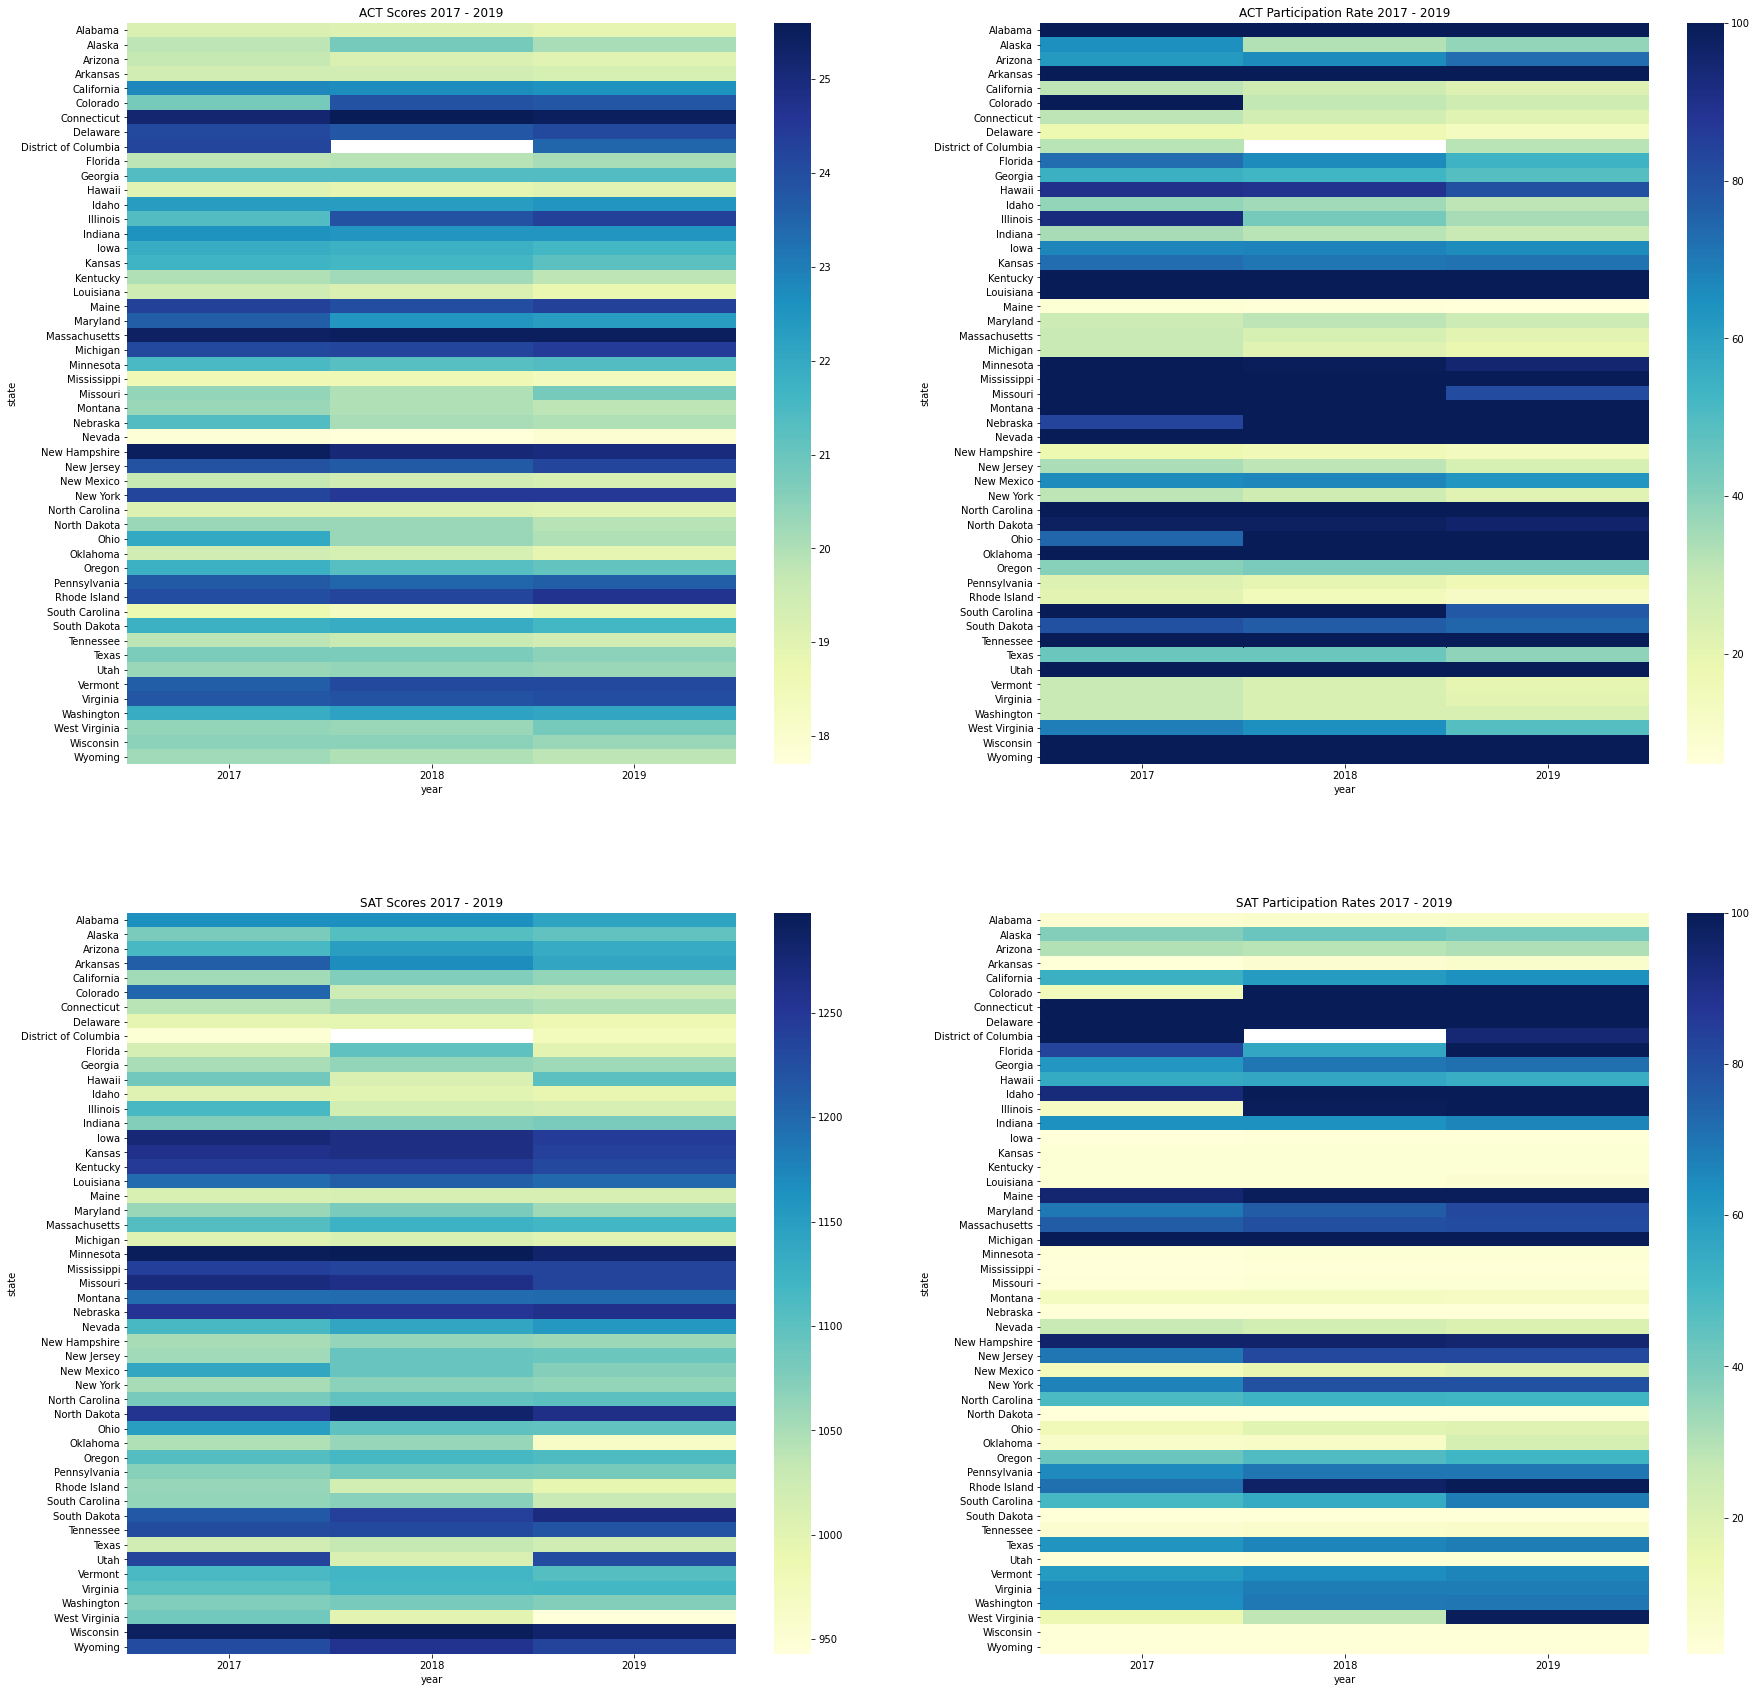

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (30,30))

sns.heatmap(pivot_act_score, cmap="YlGnBu", ax = ax[0, 0]).set_title('ACT Scores 2017 - 2019');
sns.heatmap(pivot_act_participate, cmap="YlGnBu", ax = ax[0, 1]).set_title('ACT Participation Rate 2017 - 2019');
sns.heatmap(pivot_sat_score, cmap="YlGnBu", ax = ax[1, 0]).set_title('SAT Scores 2017 - 2019');
sns.heatmap(pivot_sat_participate, cmap="YlGnBu", ax = ax[1, 1]).set_title('SAT Participation Rates 2017 - 2019');

### Using histograms to view the distribution of scores and participation rates
 - The nature of mandated exams leads to the valley.

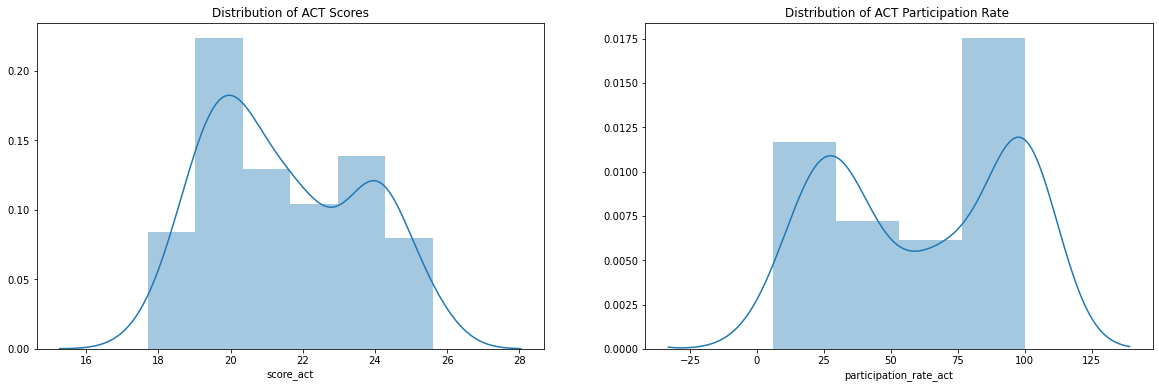

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.distplot(df['score_act'], ax = ax[0]).set_title("Distribution of ACT Scores");
sns.distplot(df['participation_rate_act'], ax = ax[1]).set_title("Distribution of ACT Participation Rate ");

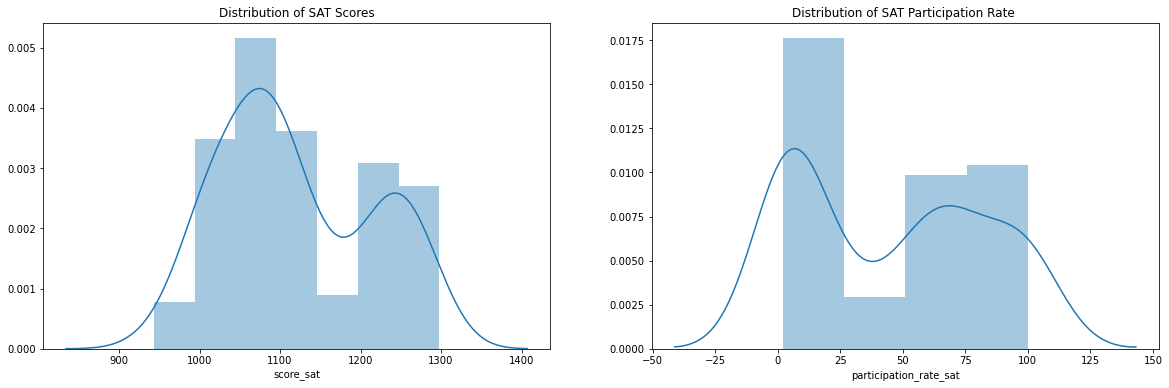

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.distplot(df['score_sat'], ax = ax[0]).set_title("Distribution of SAT Scores");
sns.distplot(df['participation_rate_sat'], ax = ax[1]).set_title("Distribution of SAT Participation Rate ");

### Using Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

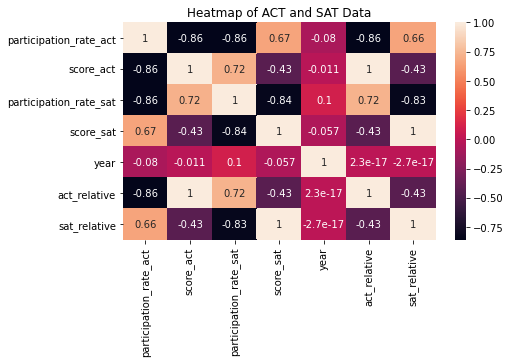

In [ ]:
#most notable: higher participation correlated with lower scores for both
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), annot=True).set_title("Heatmap of ACT and SAT Data");

### Using Seaborn's pairplot for determining relevant columns

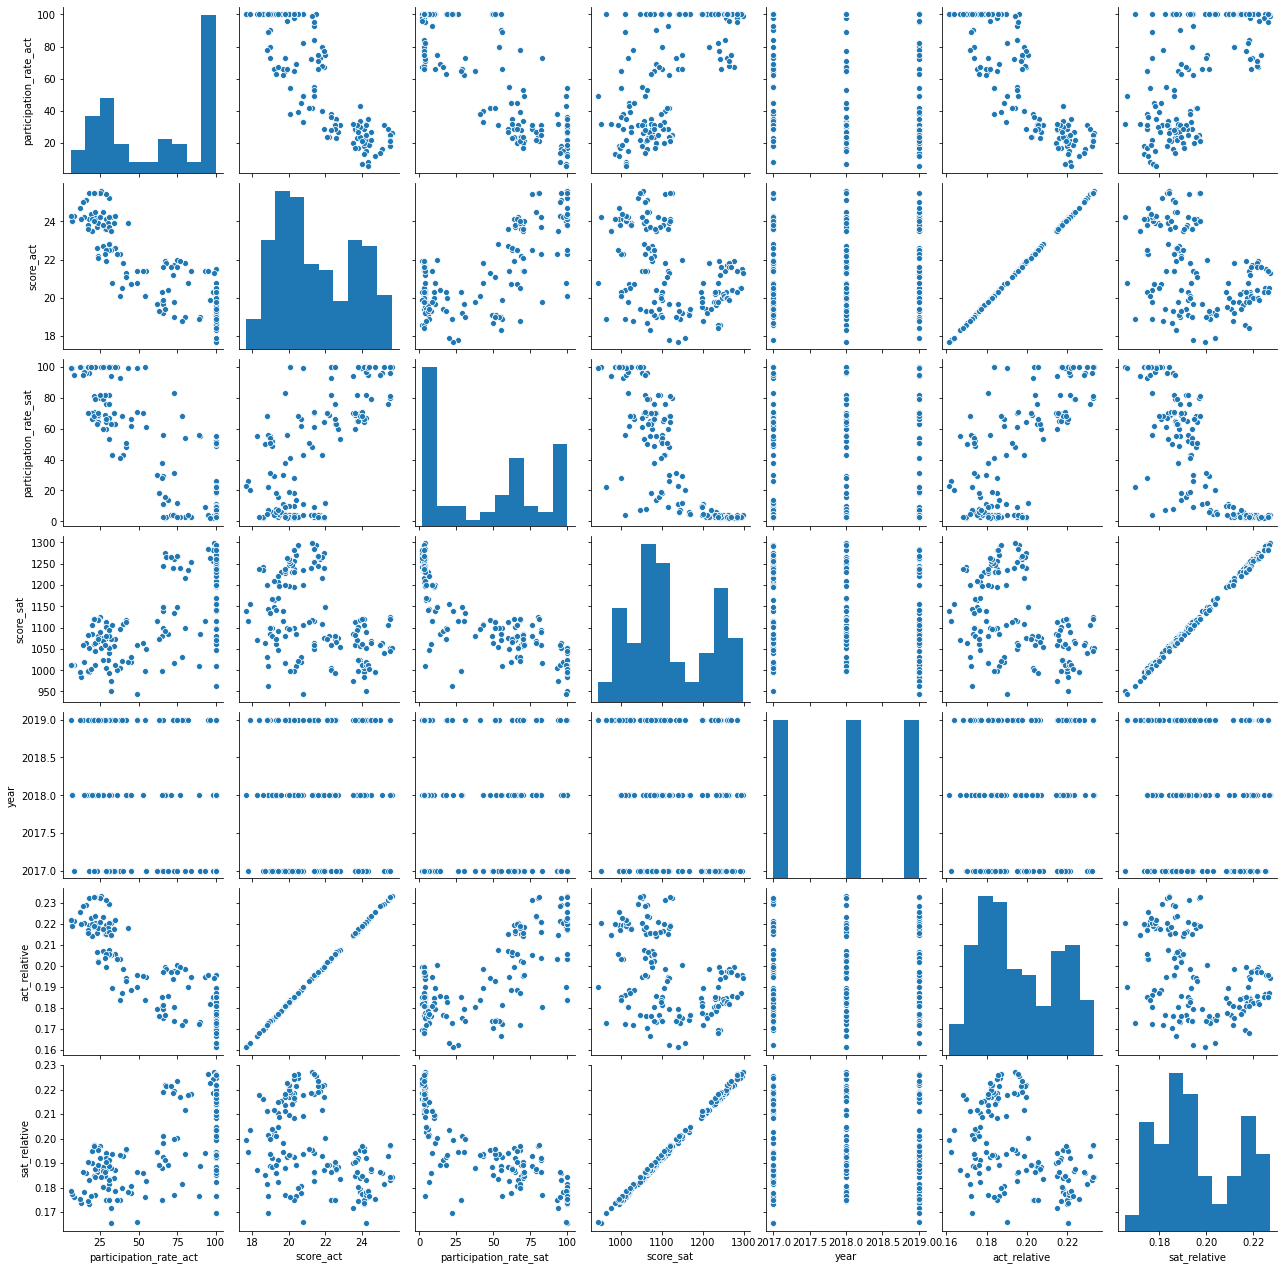

In [ ]:
sns.pairplot(df);

### Plotting and interpreting scatter plots for important columns


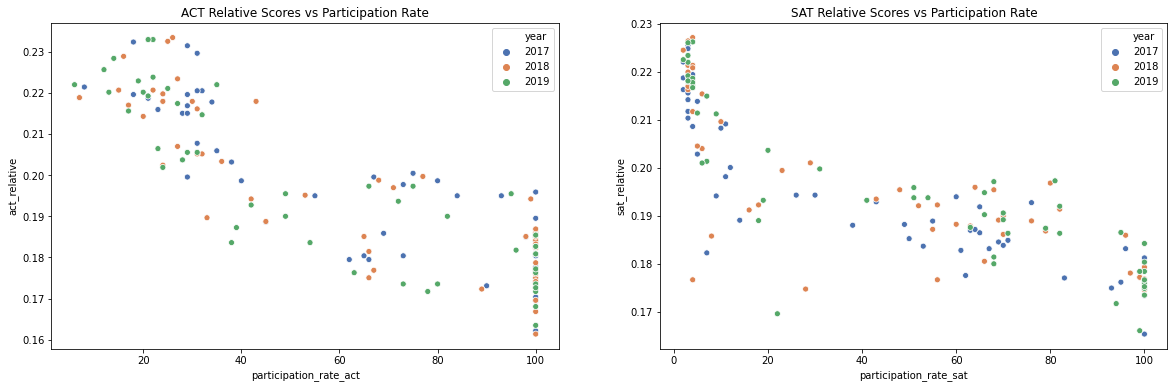

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.scatterplot(x = 'participation_rate_act',
                y = 'act_relative',
                data = df,
                legend = 'brief',
                hue = 'year',
                palette = 'deep',
               ax = ax[0]).set_title("ACT Relative Scores vs Participation Rate");
                #style = 'year');

sns.scatterplot(x = 'participation_rate_sat',
                y = 'sat_relative',
                data = df,
                legend = 'brief',
                hue = 'year',
                cmap= "YlGnBu",
                palette = 'deep',
               ax = ax[1]).set_title("SAT Relative Scores vs Participation Rate");
                #style = 'year');

### Plotting and interpreting boxplots for important columns


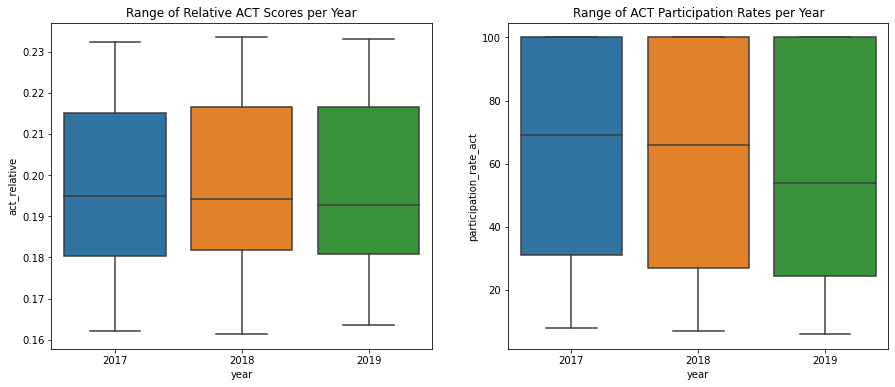

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

sns.boxplot(x = 'year',
                y = 'act_relative',
                data = df,
            ax = ax [0]
           ).set_title('Range of Relative ACT Scores per Year')
sns.boxplot(x = 'year',
                y = 'participation_rate_act',
                data = df,
            ax = ax [1]
           ).set_title('Range of ACT Participation Rates per Year');

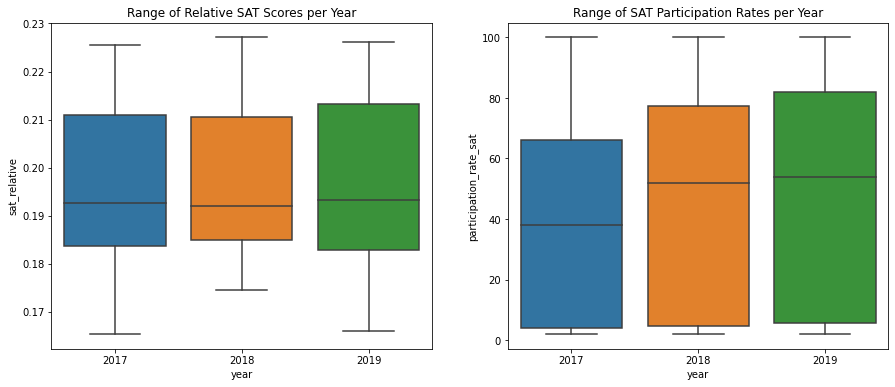

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))

sns.boxplot(x = 'year',
                y = 'sat_relative',
                data = df,
            ax = ax [0]
           ).set_title('Range of Relative SAT Scores per Year')
sns.boxplot(x = 'year',
                y = 'participation_rate_sat',
                data = df,
            ax = ax [1]
           ).set_title('Range of SAT Participation Rates per Year');

## Exploring Population for 2018
 - data source: https://www.kaggle.com/aarushimehrotra/us-populations-per-state

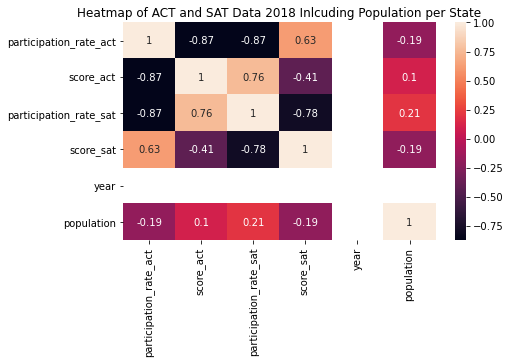

In [ ]:
plt.figure(figsize=(7, 4))
sns.heatmap(df_2.corr(), annot=True).set_title("Heatmap of ACT and SAT Data 2018 Inlcuding Population per State");

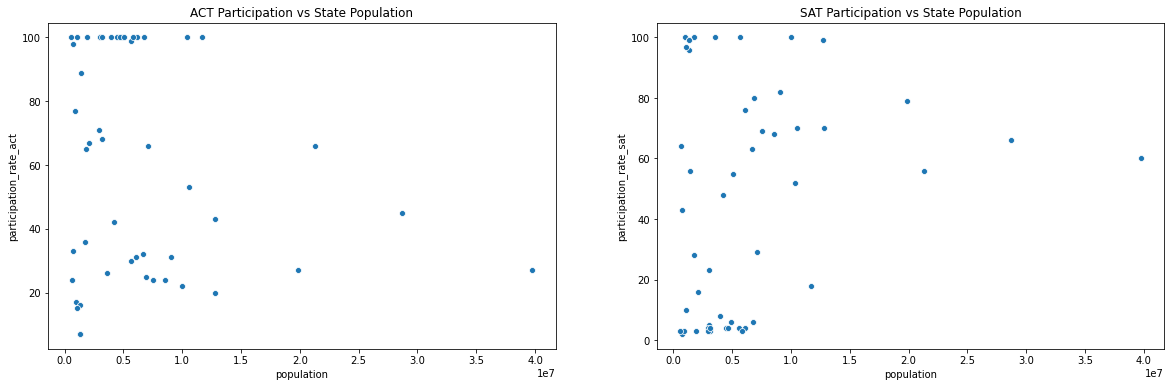

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))

sns.scatterplot(y = 'participation_rate_act',
                x = 'population',
                data = df_2,
                legend = 'brief',
                #hue = 'population',
                #hue_norm =  ,
                palette = 'deep',
               ax = ax[0]).set_title("ACT Participation vs State Population");
                #style = 'year');

sns.scatterplot(y = 'participation_rate_sat',
                x = 'population',
                data = df_2,
                legend = 'brief',
                #hue = 'population',
                #hue_norm = ,
                cmap= "YlGnBu",
                palette = 'deep',
               ax = ax[1]).set_title("SAT Participation vs State Population");
                #style = 'year');

### There is a trend of lower population states mandating ACT exams.

## Outside Research

Colorado made the SAT mandatory in 2017, which explaines the massive increase in participation.
 - source: https://www.testive.com/colorado-sat-change-2017/

Colorado not requiring SAT/ACT 2021 due to COVID; states want to move away from the tests altogether.  
 - source: https://co.chalkbeat.org/2020/6/9/21285820/no-act-or-sat-in-colorado-admissions-for-2021-graduates-bill-seeks-to-temporarily-strike-requirement

Studying with an organized curriculum can increase average scores.
 - source: https://research.collegeboard.org/pdf/osp-technical-report.pdf

## Conclusions and Recommendations

Based on the findings, it is recommend that we allocate funds equally for lobbying and advertising. We recommend the lobbying budget be allocated toward courting state government lawmakers in states where no exam is currently mandated, specifically New York and California, as they have the highest populations of unmandated students. This will include encouraging state universities to require the exam for admission. Finally, we recommend the advertising budget be spent on Facebook ads, designed to convince parents with 16 - 18 year old teens in ACT mandated states, that an SAT exam is now needed for their child to be competitive in college admissions.